In [1]:
%reload_ext autoreload
%autoreload 2

from alpharaw.mzml import MzMLReader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from alphabase.spectral_library.base import SpecLibBase

### 1. Set up data
First we will point our notebook to the raw file and search results obtained using this raw file.

We will then load three objects into the notebook:
- The raw DIA data `dia_data`
- The search results `precursor_df`
- The spectral library `spectral_library`

In [2]:
raw_files = [
     "/Users/georgwallmann/Documents/data/alphadia-validate/data/20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_05.raw"
]

current_raw_name = os.path.basename(raw_files[0]).replace('.raw', '')
current_raw_path = raw_files[0]

search_results = '/Users/georgwallmann/Documents/data/alphadia-validate/output'

In [4]:
precursor_df = pd.read_csv(os.path.join(search_results,'precursors.tsv'), sep='\t')
precursor_df = precursor_df[precursor_df['run'] == current_raw_name]

spectral_library = SpecLibBase()
spectral_library.load_hdf(os.path.join(search_results,'speclib.hdf'))

In [11]:
from alphadia.data.alpharaw_wrapper import Thermo
dia_data =  Thermo(current_raw_path)

49it [00:12,  3.90it/s]


### 2. Inspect data
Next we want to inspect the data structures to get a better understanding of the data.

#### 2.1 Spectral library
We will start with the spectral library.
It's an alphabase SpecLibBase object, which contains the following attributes:
- `precursor_df`: a pandas DataFrame containing the precursor information
- `fragment_mz_df`: a pandas DataFrame containing the fragment m/z values
- `fragment_intensity_df`: a pandas DataFrame containing the fragment intensities

The `precursor_df` links to the fragment_mz_df and fragment_intensity_df via the `frag_start_idx` and `frag_stop_idx` columns.
For unique indexing we will use the `mod_seq_charge_hash` column.

In [8]:
spectral_library.precursor_df[['precursor_mz', 'sequence', 'mods', 'mod_sites', 'charge', 'mod_seq_charge_hash', 'frag_start_idx', 'frag_stop_idx']].head()

,precursor_mz,sequence,mods,mod_sites,charge,mod_seq_charge_hash,frag_start_idx,frag_stop_idx
0,474.764789,MIIWLEK,Oxidation@M,1,2,6778347273406786435,0,6
1,466.220746,FYSQQMK,,,2,15522010155980186642,6,12
2,409.218726,ADIEEIK,,,2,1205537395403030235,12,18
3,817.430175,ADIEEIK,,,1,1205537395403030234,18,24
4,451.215463,MFVSDFR,,,2,11088622922221221635,24,30


In [6]:
spectral_library.fragment_mz_df.head()

,b_z1,b_z2,y_z1,y_z2
0,148.042679,74.524979,801.486877,401.247101
1,261.126740,131.067001,688.402832,344.705048
2,374.210815,187.609039,575.318787,288.163025
3,560.290100,280.648682,389.239471,195.123367
4,673.374207,337.190735,276.155396,138.581329


In [7]:
spectral_library.fragment_intensity_df.head()

,b_z1,b_z2,y_z1,y_z2
0,0.000000,0.0,0.125327,0.000000
1,0.335304,0.0,1.000000,0.049048
2,0.282448,0.0,0.614709,0.001847
3,0.058418,0.0,0.219854,0.000000
4,0.024189,0.0,0.172246,0.000000


#### 2.2 Precursor data

The identified precursors following search are stored in the `precursor_df` DataFrame.
The precursors in this dataframe come from the spectral library but have aditional information on their identification.

The most important columns are:
- `mod_seq_charge_hash`: the hash of the precursor sequence and charge

The scans where they were identified called frames.
- `frame_start`: the frame number of the first frame in the run.
- `frame_stop`: the frame number of the last frame in the run

Furthermore there is the q-value and a multitude of scores that were used to identify the precursor.

In [9]:
precursor_df.head()

,base_width_mobility,base_width_rt,rt_observed,mobility_observed,mono_ms1_intensity,top_ms1_intensity,sum_ms1_intensity,weighted_ms1_intensity,weighted_mass_deviation,weighted_mass_error,...,_candidate_idx,valid,candidate_idx,run,mod_seq_hash,mod_seq_charge_hash,pg_master,pg,pg_qval,intensity
0,0.0,10.800079,475.055328,0.000001,9337749.0,10849454.0,28201226.0,8371399.0,0.827318,0.827318,...,491994,True,491994,20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21m...,16436085520177021722,16436085520177021725,Q08J23,Q08J23,0.0,110027960.0
1,0.0,13.984253,276.251770,0.000001,17462440.0,17462440.0,39873656.0,13354507.0,0.264493,0.264493,...,429866,True,429866,20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21m...,7986246340266593116,7986246340266593118,Q99714,Q99714,0.0,88840992.0
2,0.0,17.052856,737.339050,0.000001,8122413.0,11355399.0,27542220.0,7753402.0,0.486335,0.486335,...,491475,True,491475,20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21m...,8082832993259321650,8082832993259321653,Q96FW1,Q96FW1,0.0,12885895.0
3,0.0,13.920166,518.606628,0.000001,7742276.5,11970143.0,29298516.0,8465340.0,0.333542,0.333542,...,485620,True,485620,20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21m...,2135183645175001270,2135183645175001273,Q9P2E9,Q9P2E9,0.0,16952130.0
4,0.0,10.875244,299.564636,0.000001,5705846.5,5705846.5,12868982.0,4234037.5,0.889920,0.889920,...,160080,True,160080,20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21m...,11690798667932387145,11690798667932387147,P49591,P49591,0.0,36278988.0


#### 2.3 DIA data

Last, we have the raw DIA data objecrt loaded from the Thermo raw file.

This object contains all scans in the `dia_data.spectrum_df` DataFrame.
Each spectrum points to a collection of peak based on the `peak_start_idx` and `peak_stop_idx` columns.

These point to the `dia_data.peak_df` DataFrame, which contains the peak information.

In [13]:
dia_data.spectrum_df.head()

,spec_idx,peak_start_idx,peak_stop_idx,rt,precursor_mz,precursor_charge,isolation_lower_mz,isolation_upper_mz,ms_level,nce
0,0,0,38,0.000000,-1.00000,0,-1.000000,-1.000000,1,0.0
1,1,38,45,0.000438,385.42508,0,384.424625,386.425535,2,25.0
2,2,45,47,0.000522,389.42691,0,388.426455,390.427365,2,25.0
3,3,47,52,0.000602,395.42963,0,394.429175,396.430085,2,25.0
4,4,52,56,0.000681,397.43054,0,396.430085,398.430995,2,25.0


In [14]:
dia_data.peak_df.head()

,mz,intensity
0,394.178497,18382.343750
1,396.203949,16736.513672
2,406.082977,10985.762695
3,415.259399,22085.912109
4,416.236694,13881.345703


#### 3 Map precursor hit from search results to raw data

Using this information we can map the identified precursors to the raw data.

We will use the `get_library_entry_by_hash` function to get the library entry for a given hash.

This function returns the library entry, the fragment m/z values and the fragment intensities.



In [17]:
hash = precursor_df['mod_seq_charge_hash'].iloc[0]

def get_library_entry_by_hash(speclib, hash, min_intensity=0.01):
    speclib_entry = speclib.precursor_df[speclib.precursor_df['mod_seq_charge_hash'] == hash].iloc[0]

    fragment_mz = speclib.fragment_mz_df.iloc[speclib_entry.frag_start_idx:speclib_entry.frag_stop_idx].to_numpy().flatten()
    fragment_intensity = speclib.fragment_intensity_df.iloc[speclib_entry.frag_start_idx:speclib_entry.frag_stop_idx].to_numpy().flatten()
    fragment_mask = fragment_intensity > min_intensity

    fragment_mz = fragment_mz[fragment_mask]
    fragment_intensity = fragment_intensity[fragment_mask]

    # sort both by mz
    fragment_order = np.argsort(fragment_mz)
    fragment_mz = fragment_mz[fragment_order]
    fragment_intensity = fragment_intensity[fragment_order]

    return speclib_entry, fragment_mz, fragment_intensity

speclib_entry, mz_library, intensity_library = get_library_entry_by_hash(spectral_library, hash)
precursor_entry = precursor_df[precursor_df['mod_seq_charge_hash'] == hash].iloc[0]

In [18]:
jit_data = dia_data.jitclass()

precursor_query = np.array([[speclib_entry.precursor_mz, speclib_entry.precursor_mz]], dtype=np.float32)
scan_limits = np.array([[precursor_entry.scan_start, precursor_entry.scan_stop, 1]], dtype=np.int64)
frame_limits = np.array([[precursor_entry.frame_start, precursor_entry.frame_stop, 1]], dtype=np.int64)

dense, precursor_index = jit_data.get_dense(
    frame_limits,
    scan_limits,
    mz_library,
    30,
    precursor_query,
)

#### 4 Visualize precursor data

Now, we want to viosualize the retrieved spectrum data.
We will start by visualizing the observed spectrum and the library spectrum.

The spectrum data `dense` is a 5 dimensional numpy array with a dense slice of the spectrum space.
The dimensions are:
- 0: either intensity information 0 or relative mass error 1
- 1: index of the fragment mz which was queried
- 2: ion mobility dimension (will be zero for DIA data)
- 3: The observations in the DIA cycle. As there might be multiple quadrupole windows where the precursor was detected, this will be a list of observations.
- 4: Retention time datapoints.

First we will select the intensity dimension and sum over all other dimensions but the fragment mz dimension.


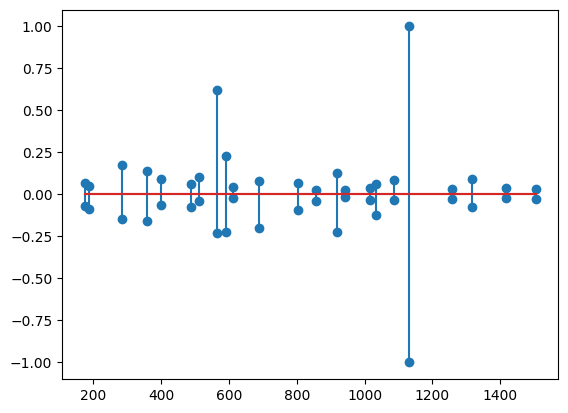

In [19]:
intensity_observed = dense[0].sum(axis=(1,2,3))
intensity_observed_normalized = intensity_observed / intensity_observed.max()
intensity_library_normalized = intensity_library / intensity_library.max()

plt.stem(mz_library, intensity_observed_normalized)
plt.stem(mz_library, -intensity_library_normalized)
plt.show()

Finally, we will visualize the Precusor ion chromatogram.
We will again select the intensity dimension and sum over ion mobility and observation but leave the retention time dimension.


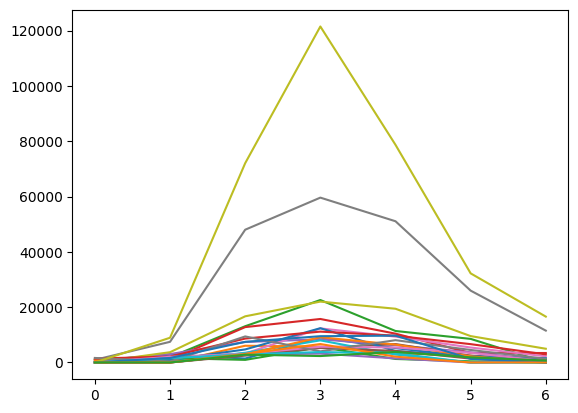

In [20]:
xic_observed = dense[0].sum(axis=(1,2))
for i in range(xic_observed.shape[0]):
    plt.plot(xic_observed[i])
plt.show()